## Introduction

When one will read the title of the article, the first thought will be like this is something which is **not very common in statisitics** but I'm sure when you will breakdown through this article in the end you will realise that you have already gone through it but not in this way. So this article will give you a learning of **widths and balance in statistics** with a certain prespective. 

Widths and balance are nothing but a measurement which will help us to know about the **distribution of the data** and and how widely the data is **spread across the distribution.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

plt.rcParams["figure.figsize"] = (10,6)

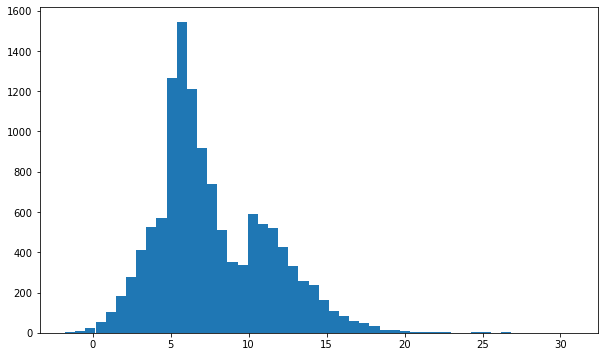

In [2]:
data = np.loadtxt("dataset.txt")
plt.hist(data, bins=50);

# Measures of width and balance

* Variance
* Standard deviation
* Skewness
* Kurtosis

### Variance

The variance of a distrbution is a measure of how much it spreads out around the mean. A touch more formally, its the expected value of the squared deviation from the mean. Even more formally, it is given by 

$$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2, $$

where $\mu$ is the mean of the dataset $x$. **Note there is a fine point about whether you should divide by $N$ or $N-1$**. Here is a manual way of calculating it:

In [3]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**2
    return summed / (len(xs) - 1)
print(get_variance([1,2,3,4,5]))

2.5


In [4]:
variance = np.var(data, ddof=1) 
print(variance)

13.137626632694301


Here is the shorter and effective way of getting the variance i.e. **np.var()** method. Note that to get the influence of **len(xs) - "1"** we have to use **ddof** parameter which is **delta degree of freedom**.

## Standard deviation

This one is simple. Its the square root of the variance. So its the expected absolute value of the deviation from the mean. And we can use `np.std` for it or `pd.DataFrame.std` ([doco here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html))

In [5]:
std = np.std(data)
print(std, std**2)

3.6244414221454435 13.136575622563685


In [6]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


Again, we have dedicated method to get the **standard deviation** (just the **square root of variance**) i.e. **np.mean** where numpy supports this particular function along with variance.

## Gaussian distribution function 

Welcome to the **Gaussian approximation**, Gaussian distribution is also known as **Normal Distribution** which is the type of CDF i.e. **continuous probability distribution** and it is only for the **real-valued random variable**. There is alos the general form of this type of distribution - PDF i.e. **Probability Density Function**.

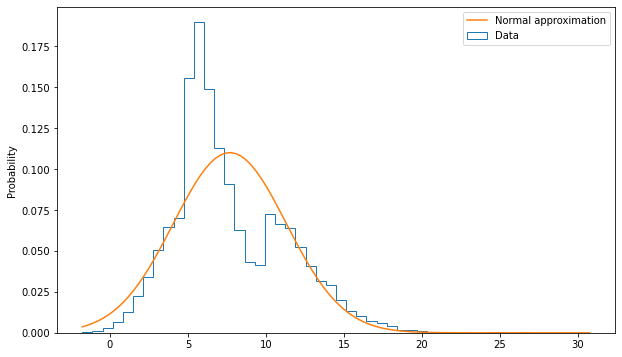

In [7]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys, label="Normal approximation")
plt.legend()
plt.ylabel("Probability");

**Inference:** Its not *too* bad, but its not the best thing either. It seems like our data isn't perfectly symmetrical, so lets quantify how asymmetrical it is.

## Skewness

In this section I might drop the word **"moment"** a few times. There are some standardised ways of quantifying "moments". The first moment is zero by definition. The second is **variance**. The third is **skewness**, which is often defined as $\gamma_1$.

$$ \gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}} = \frac{E[(x-\mu)^3]}{E[(x-\mu)^2]^{3/2}} $$

In [8]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed / (len(xs))) / (var ** 1.5)
print(get_skewness([1,2,3,4,5]))

0.0


In [9]:
skewness = st.skew(data)
print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


Let's update our normal approximation to a skewed normal approximation and see how it looks, just for fun.

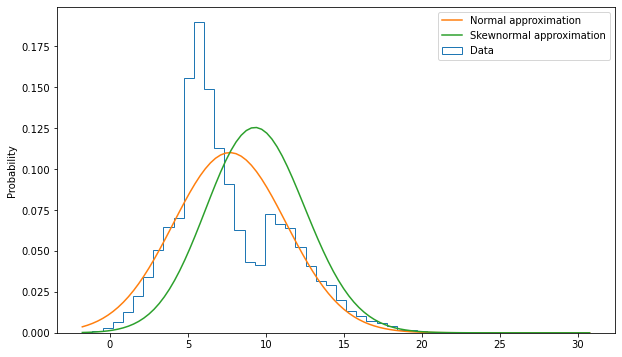

In [10]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

Oh no, this doesn't look better? Where did we go wrong?

A skew normal cant just be given the mean and standard deviation of a normal and expected to work. The skewness modifies the mean and standard deviation. You need to actually fit.

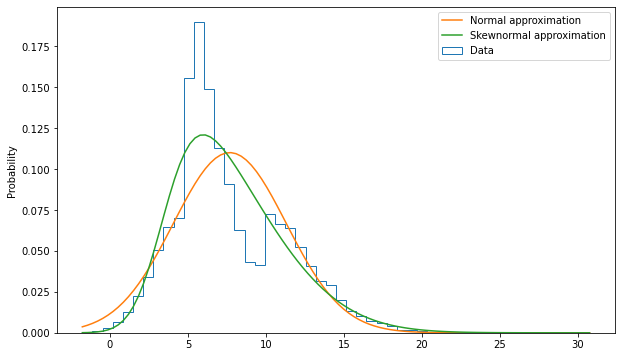

In [11]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

**Inference:** Now we can see that we got the better **skew-normal** approximation than the previous one as this time we have first fit the skewnorm probability density function which **corrected the mean for skewed data**.

## Kurtosis

The next moment, and the last one we'll consider is kurtosis. Kurtosis in simpler terms is the measure of how the data is **heavy-tailed** or **light-tailed** It has a similar definition, and is often represented as $\kappa$ or $\gamma_2$:

$$ \kappa = \frac{E[(x-\mu)^4]}{E[(x-\mu)^2]^{4/2}} $$

In [12]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**4
    return (summed / (len(xs))) / (var ** 2)
print(get_kurtosis([1,2,3,4,5]))

1.7


In [13]:
kurtosis = st.kurtosis(data, fisher=False)
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


**Fisher is to just normalise the Kurtosis**

**fisher**: Hey? So this is just a normalisation thing and because there are multiple definitions of kurtosis. With `fisher=False`, a normal distrubtion has a kurtosis of 3. With **fisher=True**, **scipy subtracts 3** from the result so that a normal distribution would have a **kurtosis of 0**. Lots of things are compared to normal distributions, so having all the moments be 0 for them is handy. If you're curious about this, the difference is between "kurtosis" and "excess kurtosis", will help which will hopefully help when googling!

## When analytics fail

At the moment we've been coming up with ways to **quantify our data distribution** such that we could try and reconstruct something approximately the same using various analytic distributions, like the normal distribution. So what happens if that isn't going to be good enough?

## Percentiles

What if we - **instead of using a mean or other such numbers - simply turned our long data vector down into a few points representing different percentiles?** We could essentially reconstruct our data distribution to an aribtrary accuracy and never worry about analytic functions.

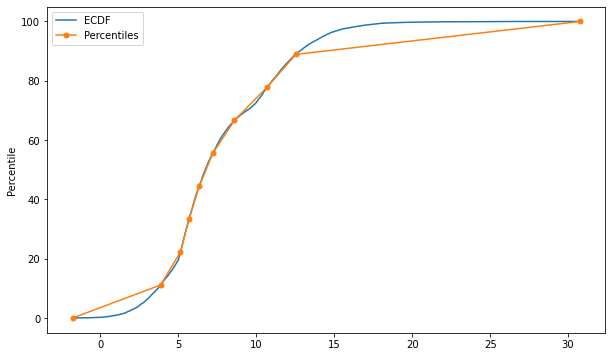

In [14]:
ps = np.linspace(0, 100, 10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

**Inference:** In the above code for getting the approximation of the **ECDF from percentile** we are using **linear method** which in the middle of the data is quite well approximated but at the same time for edges it is not performing well.

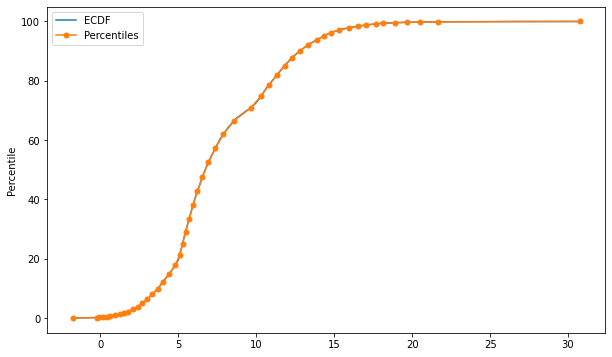

In [15]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.concatenate(([0], ps, [100])) 
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

**Inference:** As we know, according to the normal distribution the 99% of the data is can be found in the **[-3,3] value of sigma** hence, while using the same concept passing the parameters and as the result we can see that **most of the percentile data points are well approximated the ECDF plot**.

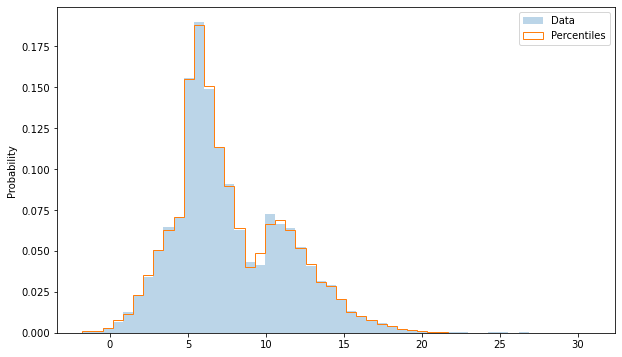

In [16]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label="Data")
plt.hist(samp_percentile_1, bins=bins, density=True, histtype="step", label="Percentiles")
plt.ylabel("Probability")
plt.legend();

**Inference:** Here we are doing some **inversion sampling** which is a method where a random variablles are continously drawn from the sample, until the certain condition are met.

**Results:** Look at how nice those tails are now! And you can see that if we increased the **number of samples** in our second percentiles to around a hundred and we could very accurately describe our **1D distribution**. And 100 data points are much faster to transfer than thousands of them.

## Conclusion

This is the end of this detailed article about width and balance measurement in statisitcs, and I hope I have keep up with my promise of giving a different prespective about this topic. For better traversing through the article, giving a summary of whatever we learned so far.

1. The very first topic we discussed was the concept behind **variance** and **Standard deviation** where both were responsible to measure the spread of the data and they both were interelated to each other.

2. Then we move forward to see some visualization on the **skewed data** (both rightly skewed and left skewed graph) just after that **kurtosis** was introduced and got implemented by python's **user-defined** function as well as **pre-defined** function.

3. At the last, we learned about how to get a backup support in the case where analytics got failed, which gave birth to **percentiles**. Along with that **inversion sampling** which was used to fit the data well in case of percentiles.